In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# 밑에 실행하면서 뜨는 빨간 경고 팝업 뜨지 않게 하기 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/wine.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


<Axes: >

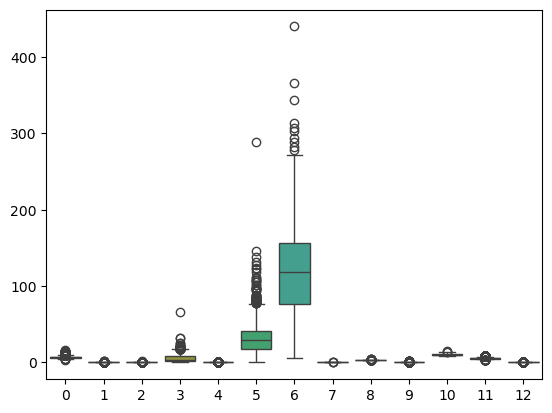

In [5]:
sns.boxplot(data)

<Axes: >

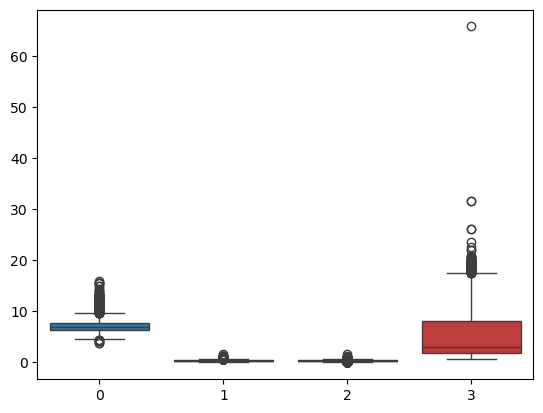

In [6]:
sns.boxplot(data.iloc[:,0:4])

# 이상값이 상당히 많음 

In [7]:
data[12].value_counts()

12
0    4898
1    1599
Name: count, dtype: int64

In [8]:
X = data.drop(12, axis=1)
y = data[12]

# 칼럼 12 가 target column

In [9]:
# 스케일링하기 

from sklearn.preprocessing import RobustScaler

In [10]:
rs = RobustScaler()
X_scaled = rs.fit_transform(X)
X_scaled 

array([[ 0.30769231,  2.41176471, -2.21428571, ...,  0.29411765,
        -0.5       , -1.        ],
       [ 0.61538462,  3.47058824, -2.21428571, ...,  1.        ,
        -0.27777778, -1.        ],
       [ 0.61538462,  2.76470588, -1.92857143, ...,  0.82352941,
        -0.27777778, -1.        ],
       ...,
       [-0.38461538, -0.29411765, -0.85714286, ..., -0.29411765,
        -0.5       ,  0.        ],
       [-1.15384615,  0.        , -0.07142857, ..., -0.76470588,
         1.38888889,  1.        ],
       [-0.76923077, -0.47058824,  0.5       , ..., -1.11764706,
         0.83333333,  0.        ]])

In [11]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [12]:
# 데이터셋을 홀드아웃으로 나눠서 분석하기 

from sklearn.model_selection import train_test_split

In [13]:
# 데이터 6000개이니 valid 로 하기 

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

# Sequential 로 해보기 (함수형/클래스형 아무거나 상관없음) 

In [14]:
# 1) Sequential

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import classification_report

2024-09-10 14:25:27.184941: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 14:25:28.174213: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-09-10 14:25:28.174387: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-09-10 14:25:28.179774: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-09-10 14:25:28.388407: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


In [15]:
X_train.shape

(3898, 12)

In [16]:
X_train.shape[1]

12

In [17]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))   # 입력층
model.add(Dense(16, activation='relu'))                 # 은닉층 1
model.add(Dense(8, activation='relu'))                  # 은닉층 2
model.add(Dense(1, activation='sigmoid'))               # 출력층, y가 이진법 (0,1) 이기 때문에 sigmoid
model.summary()

# y가 이진법 (0,1) 이기 때문에 sigmoid

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


2024-09-10 14:25:28.545937: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 14:25:28.548423: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) Graphics)
2024-09-10 14:25:28.633013: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 14:25:28.633058: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-10 14:25:28.633081: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 100, batch_size = 500, validation_data = (X_valid, y_valid)) 


# y가 이진법 (0,1) 이기 때문에 sigmoid
# 그래서 loss 부분도 binary_crossentropy

Epoch 1/100
7/8 [=========================>....] - ETA: 0s - loss: 0.6904 - accuracy: 0.5980

2024-09-10 14:25:29.273120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 14:25:29.337910: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 14:25:29.337970: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


8/8 [==============================] - 1s 35ms/step - loss: 0.6877 - accuracy: 0.6065 - val_loss: 0.6708 - val_accuracy: 0.6913
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 0.6425 - accuracy: 0.7306 - val_loss: 0.6298 - val_accuracy: 0.7498
Epoch 3/100
1/8 [==>...........................] - ETA: 0s - loss: 0.6063 - accuracy: 0.7740

2024-09-10 14:25:29.571120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 14:25:29.598023: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 14:25:29.598084: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


8/8 [==============================] - 0s 17ms/step - loss: 0.6023 - accuracy: 0.7578 - val_loss: 0.5893 - val_accuracy: 0.7660
Epoch 4/100
8/8 [==============================] - 0s 18ms/step - loss: 0.5605 - accuracy: 0.7776 - val_loss: 0.5444 - val_accuracy: 0.7929
Epoch 5/100
8/8 [==============================] - 0s 15ms/step - loss: 0.5140 - accuracy: 0.8153 - val_loss: 0.4938 - val_accuracy: 0.8229
Epoch 6/100
8/8 [==============================] - 0s 15ms/step - loss: 0.4626 - accuracy: 0.8404 - val_loss: 0.4364 - val_accuracy: 0.8522
Epoch 7/100
8/8 [==============================] - 0s 15ms/step - loss: 0.4034 - accuracy: 0.8756 - val_loss: 0.3707 - val_accuracy: 0.9022
Epoch 8/100
8/8 [==============================] - 0s 15ms/step - loss: 0.3389 - accuracy: 0.9253 - val_loss: 0.3040 - val_accuracy: 0.9461
Epoch 9/100
8/8 [==============================] - 0s 14ms/step - loss: 0.2765 - accuracy: 0.9613 - val_loss: 0.2435 - val_accuracy: 0.9661
Epoch 10/100
8/8 [==============

8/8 [==============================] - 0s 15ms/step - loss: 0.0173 - accuracy: 0.9967 - val_loss: 0.0141 - val_accuracy: 0.9969
Epoch 62/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0170 - accuracy: 0.9967 - val_loss: 0.0138 - val_accuracy: 0.9969
Epoch 63/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0169 - accuracy: 0.9967 - val_loss: 0.0137 - val_accuracy: 0.9969
Epoch 64/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0167 - accuracy: 0.9969 - val_loss: 0.0136 - val_accuracy: 0.9969
Epoch 65/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0165 - accuracy: 0.9969 - val_loss: 0.0135 - val_accuracy: 0.9977
Epoch 66/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0163 - accuracy: 0.9969 - val_loss: 0.0136 - val_accuracy: 0.9969
Epoch 67/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0162 - accuracy: 0.9969 - val_loss: 0.0135 - val_accuracy: 0.9969
Epoch 68/100
8/8 [========

In [19]:
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x : 1 if x > 0.5 else 0)
print(classification_report(y_test, pred))

41/41 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       976
           1       0.99      0.99      0.99       324

    accuracy                           1.00      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



2024-09-10 14:25:41.944002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 14:25:42.100190: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 14:25:42.100259: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-10 14:25:42.116537: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 14:25:42.116611: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

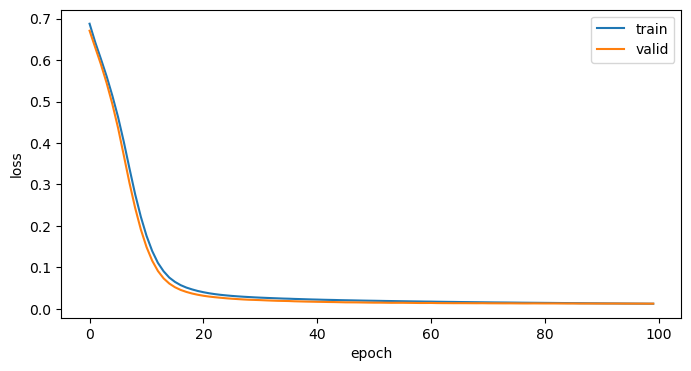

In [21]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'valid'])
plt.show()

# EarlyStopping 으로 학습 조기 중단 및 저장하기 

* EarlyStopping : 성능 개선이 멈추면 학습을 조기에 중단하는 콜백 
* ModelCheckpoint : 학습 중 가장 성능이 좋은 모델을 자동으로 저장하는 콜백 

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [23]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=30)

# patience=30 이 부분의 수치를 바꾸면 새로 실행되고 파일에 저장됨
# patience=50 이렇게 바꿈

# ModelCheckpoint 
* 모델을 중간에 저장하는 옵션

In [24]:
import os
if not os.path.exists("./model"):
        os.makedirs("./model")
        print(f"Directory /model created.")
else:
        print(f"Directory /model already exists.")

Directory /model already exists.


In [25]:
modelpath = "./model/{epoch:03d}--{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [26]:
history = model.fit(X_train, y_train, epochs = 1000, batch_size = 500, validation_data = (X_valid, y_valid), 
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.0122 - accuracy: 0.9974 - val_loss: 0.0125 - val_accuracy: 0.9969
Epoch 2/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0121 - accuracy: 0.9974 - val_loss: 0.0125 - val_accuracy: 0.9969
Epoch 3/1000
8/8 [==============================] - 0s 23ms/step - loss: 0.0120 - accuracy: 0.9977 - val_loss: 0.0124 - val_accuracy: 0.9969
Epoch 4/1000
8/8 [==============================] - 0s 21ms/step - loss: 0.0119 - accuracy: 0.9974 - val_loss: 0.0123 - val_accuracy: 0.9969
Epoch 5/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.0118 - accuracy: 0.9977 - val_loss: 0.0124 - val_accuracy: 0.9969
Epoch 6/1000
8/8 [==============================] - 0s 17ms/step - loss: 0.0117 - accuracy: 0.9977 - val_loss: 0.0125 - val_accuracy: 0.9969
Epoch 7/1000
8/8 [==============================] - 0s 17ms/step - loss: 0.0116 - accuracy: 0.9977 - val_loss: 0.0124 - val_accuracy: 0.9969
Epoch 8/1000


Epoch 59/1000
8/8 [==============================] - 0s 18ms/step - loss: 0.0074 - accuracy: 0.9979 - val_loss: 0.0122 - val_accuracy: 0.9977
Epoch 60/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0073 - accuracy: 0.9982 - val_loss: 0.0121 - val_accuracy: 0.9977
Epoch 61/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0072 - accuracy: 0.9982 - val_loss: 0.0121 - val_accuracy: 0.9969
Epoch 62/1000
8/8 [==============================] - 0s 17ms/step - loss: 0.0072 - accuracy: 0.9982 - val_loss: 0.0121 - val_accuracy: 0.9977
Epoch 63/1000
8/8 [==============================] - 0s 17ms/step - loss: 0.0071 - accuracy: 0.9982 - val_loss: 0.0121 - val_accuracy: 0.9977
Epoch 64/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.0070 - accuracy: 0.9982 - val_loss: 0.0121 - val_accuracy: 0.9977
Epoch 65/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0070 - accuracy: 0.9982 - val_loss: 0.0121 - val_accuracy: 0.9977
Epoch 

8/8 [==============================] - 0s 15ms/step - loss: 0.0039 - accuracy: 0.9985 - val_loss: 0.0115 - val_accuracy: 0.9977
Epoch 117/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0039 - accuracy: 0.9985 - val_loss: 0.0115 - val_accuracy: 0.9977
Epoch 118/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0038 - accuracy: 0.9985 - val_loss: 0.0115 - val_accuracy: 0.9977
Epoch 119/1000
8/8 [==============================] - 0s 19ms/step - loss: 0.0037 - accuracy: 0.9985 - val_loss: 0.0115 - val_accuracy: 0.9977
Epoch 120/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0037 - accuracy: 0.9985 - val_loss: 0.0115 - val_accuracy: 0.9977
Epoch 121/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.0036 - accuracy: 0.9985 - val_loss: 0.0116 - val_accuracy: 0.9977
Epoch 122/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0036 - accuracy: 0.9985 - val_loss: 0.0115 - val_accuracy: 0.9977
Epoch 123/1000

# 저장된 베스트 모델을 불러와서 테스트 하기 

In [27]:
from tensorflow.keras.models import load_model

In [28]:
best_model = load_model("./model/001--0.0097.keras")

In [29]:
best_pred = best_model.predict(X_test)
best_pred = pd.DataFrame(best_pred)
best_pred = best_pred[0].apply(lambda x:1 if x > 0.5 else 0)
print(classification_report(y_test,best_pred))

41/41 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       976
           1       0.99      0.99      0.99       324

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



2024-09-10 14:26:00.545458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


# ---------------------------------------------------------------------------------------------------

## 다른 데이터로 실행하기

In [30]:
wine = pd.read_csv("../07deep_learning/data/winequality-white.csv", sep = ";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [31]:
wine.info()

# 결측치없다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<Axes: >

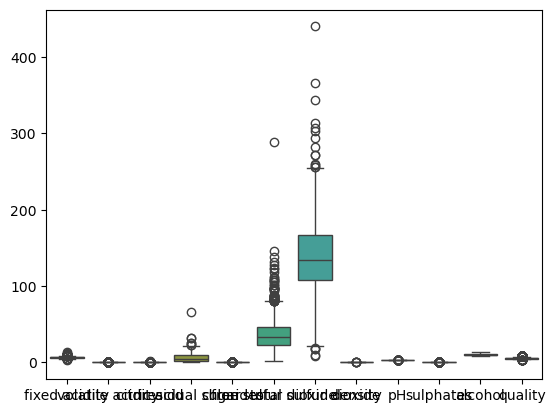

In [32]:
sns.boxplot(wine)

In [33]:
wine['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [34]:
X = wine.drop('quality', axis=1).copy()
y = wine['quality'].copy()
y2 = wine['quality'].copy()

# wine['quality'] 가 target column

In [35]:
# 스케일링하기 

from sklearn.preprocessing import RobustScaler


# 이상치가 많기 때문에 RobustScaler 로 사용한다. 

In [36]:
rs2 =  RobustScaler() # 중앙값과 IQR 을 사용한 스케일링

X_scaled = rs2.fit_transform(X)
X_scaled

# 중앙값을 기준으로 스케일링하고, 사분위 범위를 사용하여 이상치의 영향을 줄인다. 
# 이상치에 강한 스케일링 방법

array([[ 0.2       ,  0.09090909,  0.33333333, ..., -0.94736842,
        -0.14285714, -0.84210526],
       [-0.5       ,  0.36363636,  0.16666667, ...,  0.63157895,
         0.14285714, -0.47368421],
       [ 1.3       ,  0.18181818,  0.66666667, ...,  0.42105263,
        -0.21428571, -0.15789474],
       ...,
       [-0.3       , -0.18181818, -1.08333333, ..., -1.        ,
        -0.07142857, -0.52631579],
       [-1.3       ,  0.27272727, -0.16666667, ...,  0.84210526,
        -0.64285714,  1.26315789],
       [-0.8       , -0.45454545,  0.5       , ...,  0.42105263,
        -1.07142857,  0.73684211]])

* StandardScaler : 데이터가 정규분포를 따르는 경우 가장 적합
* MinMaxScaler : 피처 값이 다양한 범위에 분포되어 있고, 이상치가 많으면 적합함
* RobustScaler : 이상치가 많은 경우에 유리 

In [37]:
y = pd.get_dummies(y)
y

,3,4,5,6,7,8,9
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
4893,False,False,False,True,False,False,False
4894,False,False,True,False,False,False,False
4895,False,False,False,True,False,False,False
4896,False,False,False,False,True,False,False


In [38]:
# 데이터셋을 홀드아웃으로 나눠서 분석하기 

from sklearn.model_selection import train_test_split

In [39]:
# 데이터 4000개이니 valid 로 하기 

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, stratify=y, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

# Sequential 로 해보기

In [40]:
# 1) Sequential

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report

In [41]:
X_train.shape[1]

11

In [42]:
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))   # 입력층
model2.add(Dense(32, activation='relu'))                  # 은닉층 1
model2.add(Dense(64, activation='relu'))                  # 은닉층 2
model2.add(Dense(32, activation='relu'))                  # 은닉층 3
model2.add(Dense(16, activation='relu'))                  # 은닉층 4
model2.add(Dense(7, activation='softmax'))                # 출력층, 다중분류
# 클래스가 7개이기 때문에 7을 준다.
model2.summary()

# 다중분류

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                768       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 7)                 119       
                                                                 
Total params: 7,687
Trainable params: 7,687
Non-traina

In [43]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience = 100)
filepath = "./model/white_wine{epoch:04d}__{val_loss:.4f}.keras"
model_save = ModelCheckpoint(filepath = filepath, save_best_only=True)
history2 = model2.fit(X_train, y_train, epochs = 10000, batch_size = 500, validation_data = (X_valid, y_valid), callbacks = [early_stop, model_save]) 


Epoch 1/10000
6/6 [==============================] - ETA: 0s - loss: 1.9353 - accuracy: 0.2335

2024-09-10 14:26:01.782887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 14:26:01.841528: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 14:26:01.841586: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 1s 70ms/step - loss: 1.9353 - accuracy: 0.2335 - val_loss: 1.8904 - val_accuracy: 0.3367
Epoch 2/10000
1/6 [====>.........................] - ETA: 0s - loss: 1.8930 - accuracy: 0.3720

2024-09-10 14:26:02.076208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 14:26:02.109475: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 14:26:02.109534: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 0s 34ms/step - loss: 1.8585 - accuracy: 0.4204 - val_loss: 1.8129 - val_accuracy: 0.4571
Epoch 3/10000
6/6 [==============================] - 0s 32ms/step - loss: 1.7677 - accuracy: 0.4704 - val_loss: 1.7038 - val_accuracy: 0.4592
Epoch 4/10000
6/6 [==============================] - 0s 30ms/step - loss: 1.6392 - accuracy: 0.4840 - val_loss: 1.5557 - val_accuracy: 0.4724
Epoch 5/10000
6/6 [==============================] - 0s 39ms/step - loss: 1.4836 - accuracy: 0.4871 - val_loss: 1.3991 - val_accuracy: 0.4827
Epoch 6/10000
6/6 [==============================] - 0s 38ms/step - loss: 1.3489 - accuracy: 0.4935 - val_loss: 1.3068 - val_accuracy: 0.4908
Epoch 7/10000
6/6 [==============================] - 0s 38ms/step - loss: 1.2790 - accuracy: 0.5031 - val_loss: 1.2745 - val_accuracy: 0.4867
Epoch 8/10000
6/6 [==============================] - 0s 30ms/step - loss: 1.2528 - accuracy: 0.5157 - val_loss: 1.2552 - val_accuracy: 0.5153
Epoch 9/10000
6/6 [=

6/6 [==============================] - 0s 16ms/step - loss: 0.8704 - accuracy: 0.6423 - val_loss: 1.0551 - val_accuracy: 0.5500
Epoch 60/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.8666 - accuracy: 0.6426 - val_loss: 1.0595 - val_accuracy: 0.5408
Epoch 61/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.8585 - accuracy: 0.6460 - val_loss: 1.0588 - val_accuracy: 0.5633
Epoch 62/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.8560 - accuracy: 0.6491 - val_loss: 1.0667 - val_accuracy: 0.5582
Epoch 63/10000
6/6 [==============================] - 0s 23ms/step - loss: 0.8561 - accuracy: 0.6443 - val_loss: 1.0554 - val_accuracy: 0.5643
Epoch 64/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.8490 - accuracy: 0.6528 - val_loss: 1.0603 - val_accuracy: 0.5469
Epoch 65/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.8428 - accuracy: 0.6481 - val_loss: 1.0588 - val_accuracy: 0.5510
Epoch 66/10000

6/6 [==============================] - 0s 21ms/step - loss: 0.6708 - accuracy: 0.7417 - val_loss: 1.1529 - val_accuracy: 0.5582
Epoch 117/10000
6/6 [==============================] - 0s 19ms/step - loss: 0.6654 - accuracy: 0.7423 - val_loss: 1.1587 - val_accuracy: 0.5612
Epoch 118/10000
6/6 [==============================] - 0s 23ms/step - loss: 0.6626 - accuracy: 0.7434 - val_loss: 1.1574 - val_accuracy: 0.5602
Epoch 119/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.6556 - accuracy: 0.7471 - val_loss: 1.1615 - val_accuracy: 0.5643
Epoch 120/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.6562 - accuracy: 0.7434 - val_loss: 1.1689 - val_accuracy: 0.5653
Epoch 121/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.6571 - accuracy: 0.7451 - val_loss: 1.1676 - val_accuracy: 0.5602
Epoch 122/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.6517 - accuracy: 0.7512 - val_loss: 1.1748 - val_accuracy: 0.5694
Epoch 12

In [52]:
wine_best_model = load_model("./model/white_wine0001__1.8904.keras")
wine_pred = wine_best_model.predict(X_test)
wine_pred = pd.DataFrame(wine_pred, columns = y.columns)

31/31 [==============================] - 0s 3ms/step


2024-09-10 14:33:37.554668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [53]:
wine_pred 

,3,4,5,6,7,8,9
0,0.139927,0.142714,0.142892,0.147985,0.145178,0.143190,0.138113
1,0.140001,0.141627,0.147060,0.146107,0.144495,0.141354,0.139356
2,0.132888,0.137718,0.144653,0.146849,0.156503,0.145591,0.135797
3,0.130727,0.142734,0.138916,0.153043,0.157908,0.147233,0.129440
4,0.136807,0.141923,0.142586,0.150979,0.148929,0.144072,0.134705
...,...,...,...,...,...,...,...
975,0.127228,0.143253,0.158703,0.142769,0.150106,0.139710,0.138231
976,0.121102,0.131622,0.143368,0.150179,0.176346,0.149305,0.128077
977,0.130852,0.134992,0.153660,0.158598,0.145547,0.147337,0.129014
978,0.120754,0.146305,0.138285,0.153421,0.161909,0.153170,0.126156


In [55]:
y_test_class = y_test.idxmax(axis = 1)
y_test_class = y_test_class.reset_index(drop=True)
y_test_class

0      6
1      6
2      7
3      7
4      5
      ..
975    6
976    4
977    5
978    6
979    6
Length: 980, dtype: int64

In [56]:
wine_pred_class = wine_pred.idxmax(axis=1)
wine_pred_class 

0      6
1      5
2      7
3      7
4      6
      ..
975    5
976    7
977    6
978    7
979    5
Length: 980, dtype: int64

In [57]:
print(classification_report(y_test_class, wine_pred_class ))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        33
           5       0.41      0.39      0.40       291
           6       0.42      0.22      0.29       440
           7       0.22      0.60      0.32       176
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         1

    accuracy                           0.32       980
   macro avg       0.15      0.17      0.14       980
weighted avg       0.35      0.32      0.31       980



plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'valid'])
plt.show()

### XGB로 비교 분석
* Gradient Boosting 기반으로 함 
* 부스팅 기법은 여러 약한 모델을 순차적으로 학습하고, 이전 모델이 만든 오차를 줄이는 방식으로 새로운 모델을 추가함. 
* 즉, 각 새로운 모델은 이전 모델들이 예측하지 못한 부분을 더 잘 예측하려고 시도함.

In [66]:
#!pip install xgboost

In [67]:
y2

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le = LabelEncoder()
y2_labeled = le.fit_transform(y2)
y2_labeled

array([3, 3, 3, ..., 3, 4, 3])

In [70]:
from xgboost import XGBClassifier

In [71]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_scaled, y2, test_size=0.4, stratify=y2-labeled, random_state=10)
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_valid2, y_valid2, test_size=0.5, stratify=y_valid2, random_state=10)

NameError: name 'labeled' is not defined

In [72]:
xgb = XGBClassifier(max_depth=5, n_estimator=1000, random_state=10, n_jobs = -1)
xgb.fit(X_train2, y_train2)
xgb_pred = xgb.predict(X_valid2)
print(classification_report(le.inverse_transform(y_valid2), le.inverse_transform(xgb_pred)))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got [3 4 5 6 7 8 9]

## ADASYN
* Adaptive Synthetic Sampling Approach for Imbalanced Learning 
* 불균형 데이터 문제를 해결하기 위한 오버샘플링 기법 중 하나 
* 불균형 데이터 : 클래스 간 데이터 수가 크게 차이 나는 상황을 말함 
* ADASYN 은 소수 클래스의 데이터를 증가시켜 불균형 문제를 완화함  


In [ ]:
x_train_adasyn

In [ ]:
y_train_adasyn.value_counts()

In [ ]:
y_train_adasyn = pd.get_dummies(y_train_adasyn)

In [ ]:
y_valid = pd.get_dummies(y_valid)
y_valid 

In [ ]:
y_test = pd.get_dummies(y_test)
y_test